In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

In [23]:
from sklearn import set_config
set_config(transform_output = "pandas")

In [72]:
DATA_PATH = "data/"
data = pd.read_csv(DATA_PATH + 'label_encoded.csv', sep=';')
data.head()

,cle,Respondent_ID,weight,A11,A12,A13,A14,A4,A5,A5bis,...,RS193,RS102RECAP,rs11recap2,RS11recap,RS193bis,RS2Recap,RS56Recap,RS2,RS11,RS102
0,1,MET20_999999996,2.501255,1,0,0,0,1,2.0,NaN,...,2,4,1,2,NaN,1,1,24,0,4
1,2,MET20_98888888,0.722914,1,0,0,0,1,5.0,NaN,...,2,1,1,2,NaN,4,1,50,0,1
2,3,MET20_1978307,1.039611,1,0,0,0,1,2.0,NaN,...,2,3,2,1,NaN,3,2,37,1,3
3,4,MET20_1302078,0.976590,1,1,1,0,1,1.0,NaN,...,2,2,1,2,NaN,5,3,63,0,2
4,5,MET20_1869308,0.812315,0,1,0,0,2,NaN,1.0,...,2,3,2,1,NaN,3,1,44,1,3


In [73]:
to_drop = ["Respondent_ID", "weight"]

usages = to_drop + ["A11", "A12", "A13", "A14", "A4", "A5", "A5bis", "A8_1_slice", "A8_2_slice", "A8_3_slice", "A8_4_slice", "B1_1_slice", "B1_2_slice", "B2_1_slice", "B2_2_slice", "B3", "B4", "B6", "C1_1_slice", "C1_2_slice", "C1_3_slice", "C1_4_slice", "C1_5_slice", "C1_6_slice", "C1_7_slice", "C1_8_slice", "C1_9_slice"]

attitudes = to_drop + ["A9_1_slice", "A9_2_slice", "A9_3_slice", "A9_4_slice", "A9_5_slice", "A9_6_slice", "A9_7_slice", "A9_8_slice", "A9_9_slice", "A9_10_slice", "A9_11_slice", "A9_12_slice", "A9_13_slice", "A9_14_slice", "A9_15_slice", "A9_16_slice", "A10_1_slice", "A10_2_slice", "A10_3_slice", "A10_4_slice", "A10_5_slice", "A10_6_slice", "A10_7_slice", "A10_8_slice", "A11_1_slice", "A11_2_slice", "A11_3_slice", "A11_4_slice", "A11_5_slice", "A11_6_slice", "A11_7_slice", "A11_8_slice", "A11_9_slice", "A11_10_slice", "A11_11_slice", "A11_12_slice", "A11_13_slice"]

data_usages = data[usages].copy()
data_attitudes = data[attitudes].copy()

In [74]:
respondents_usages = data_usages["Respondent_ID"]
weights_usages = data_usages["weight"]
data_usages = data_usages.drop(to_drop, axis=1)

respondents_attitudes = data_attitudes["Respondent_ID"]
weights_attitudes = data_attitudes["weight"]
data_attitudes = data_attitudes.drop(to_drop, axis=1)

### Attitude

In [75]:
enc = OneHotEncoder(sparse_output=False)
data_attitude_enc = enc.fit_transform(data_attitudes)
data_attitude_enc.head()

,A9_1_slice_1,A9_1_slice_2,A9_1_slice_3,A9_1_slice_4,A9_2_slice_1,A9_2_slice_2,A9_2_slice_3,A9_2_slice_4,A9_3_slice_1,A9_3_slice_2,...,A11_11_slice_3,A11_11_slice_4,A11_12_slice_1,A11_12_slice_2,A11_12_slice_3,A11_12_slice_4,A11_13_slice_1,A11_13_slice_2,A11_13_slice_3,A11_13_slice_4
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [77]:
# multiply each row by its weight
data_attitude_weighted = data_attitude_enc.multiply(weights_usages, axis="index")
data_attitude_weighted

,A9_1_slice_1,A9_1_slice_2,A9_1_slice_3,A9_1_slice_4,A9_2_slice_1,A9_2_slice_2,A9_2_slice_3,A9_2_slice_4,A9_3_slice_1,A9_3_slice_2,...,A11_11_slice_3,A11_11_slice_4,A11_12_slice_1,A11_12_slice_2,A11_12_slice_3,A11_12_slice_4,A11_13_slice_1,A11_13_slice_2,A11_13_slice_3,A11_13_slice_4
0,0.000000,2.501255,0.000000,0.0,0.000000,2.501255,0.000000,0.000000,0.000000,2.501255,...,0.000000,0.0,0.000000,2.501255,0.0,0.0,0.000000,2.501255,0.000000,0.000000
1,0.722914,0.000000,0.000000,0.0,0.722914,0.000000,0.000000,0.000000,0.722914,0.000000,...,0.000000,0.0,0.000000,0.722914,0.0,0.0,0.000000,0.722914,0.000000,0.000000
2,0.000000,0.000000,1.039611,0.0,0.000000,1.039611,0.000000,0.000000,0.000000,1.039611,...,0.000000,0.0,0.000000,1.039611,0.0,0.0,0.000000,1.039611,0.000000,0.000000
3,0.976590,0.000000,0.000000,0.0,0.000000,0.976590,0.000000,0.000000,0.000000,0.976590,...,0.000000,0.0,0.976590,0.000000,0.0,0.0,0.000000,0.976590,0.000000,0.000000
4,0.000000,0.812315,0.000000,0.0,0.000000,0.812315,0.000000,0.000000,0.000000,0.812315,...,0.000000,0.0,0.000000,0.812315,0.0,0.0,0.000000,0.812315,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.000000,0.000000,0.905997,0.0,0.000000,0.905997,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.905997,0.000000,0.0,0.0,0.905997,0.000000,0.000000,0.000000
4996,0.000000,1.257884,0.000000,0.0,0.000000,0.000000,1.257884,0.000000,0.000000,0.000000,...,1.257884,0.0,0.000000,1.257884,0.0,0.0,0.000000,0.000000,0.000000,1.257884
4997,0.000000,0.000000,1.094695,0.0,0.000000,0.000000,0.000000,1.094695,0.000000,0.000000,...,1.094695,0.0,0.000000,1.094695,0.0,0.0,0.000000,0.000000,1.094695,0.000000
4998,0.000000,0.000000,2.022023,0.0,0.000000,0.000000,2.022023,0.000000,0.000000,0.000000,...,0.000000,0.0,2.022023,0.000000,0.0,0.0,0.000000,0.000000,2.022023,0.000000


In [79]:
pca = PCA(n_components=3)
pca.fit(data_attitude_weighted)
data_pca = pca.transform(data_attitude_weighted)

In [80]:
data_pca

,pca0,pca1,pca2
0,8.936042,6.583937,-1.027616
1,-1.717206,0.273206,-1.040582
2,2.313736,1.224416,-1.402304
3,0.254143,0.605350,-0.324792
4,1.366890,0.924292,-1.661412
...,...,...,...
4995,-2.631905,1.153255,0.709477
4996,1.488316,0.424449,0.239231
4997,1.101286,-2.459769,1.500531
4998,4.938088,-0.923556,3.532443


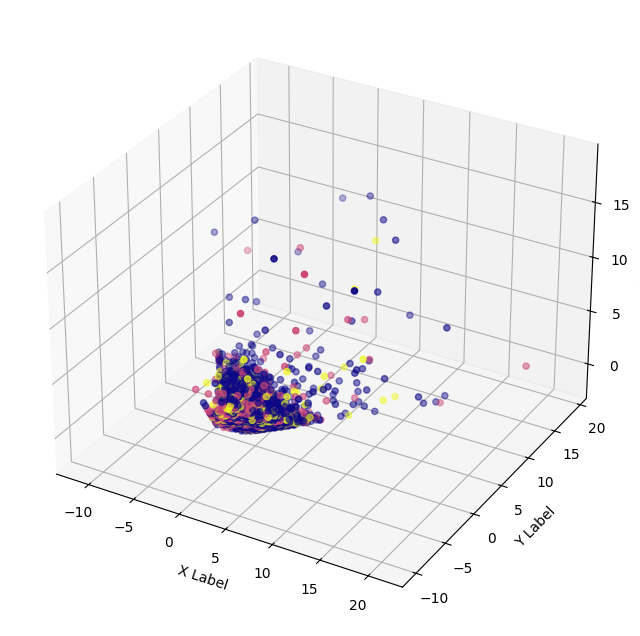

In [81]:
# Plotting in 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca.iloc[:, 0], data_pca.iloc[:, 1], data_pca.iloc[:, 2], cmap='plasma', c=data["A4"])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

### Usages

In [82]:
enc = OneHotEncoder(sparse_output=False)
data_usage_enc = enc.fit_transform(data_usages)
data_usage_enc.head()

,A11_0,A11_1,A12_0,A12_1,A13_0,A13_1,A14_0,A4_1,A4_2,A4_3,...,C1_8_slice_1,C1_8_slice_2,C1_8_slice_3,C1_8_slice_4,C1_8_slice_5,C1_9_slice_1,C1_9_slice_2,C1_9_slice_3,C1_9_slice_4,C1_9_slice_5
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [83]:
# multiply each row by its weight
data_usage_weighted = data_usage_enc.multiply(weights_usages, axis="index")
data_usage_weighted

,A11_0,A11_1,A12_0,A12_1,A13_0,A13_1,A14_0,A4_1,A4_2,A4_3,...,C1_8_slice_1,C1_8_slice_2,C1_8_slice_3,C1_8_slice_4,C1_8_slice_5,C1_9_slice_1,C1_9_slice_2,C1_9_slice_3,C1_9_slice_4,C1_9_slice_5
0,0.000000,2.501255,2.501255,0.000000,2.501255,0.000000,2.501255,2.501255,0.000000,0.000000,...,0.0,2.501255,0.0,0.000000,0.000000,0.0,2.501255,0.0,0.000000,0.000000
1,0.000000,0.722914,0.722914,0.000000,0.722914,0.000000,0.722914,0.722914,0.000000,0.000000,...,0.0,0.000000,0.0,0.722914,0.000000,0.0,0.000000,0.0,0.722914,0.000000
2,0.000000,1.039611,1.039611,0.000000,1.039611,0.000000,1.039611,1.039611,0.000000,0.000000,...,0.0,0.000000,0.0,1.039611,0.000000,0.0,0.000000,0.0,1.039611,0.000000
3,0.000000,0.976590,0.000000,0.976590,0.000000,0.976590,0.976590,0.976590,0.000000,0.000000,...,0.0,0.000000,0.0,0.976590,0.000000,0.0,0.000000,0.0,0.976590,0.000000
4,0.812315,0.000000,0.000000,0.812315,0.812315,0.000000,0.812315,0.000000,0.812315,0.000000,...,0.0,0.000000,0.0,0.812315,0.000000,0.0,0.000000,0.0,0.812315,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.000000,0.905997,0.905997,0.000000,0.000000,0.905997,0.905997,0.000000,0.000000,0.905997,...,0.0,0.000000,0.0,0.905997,0.000000,0.0,0.000000,0.0,0.000000,0.905997
4996,1.257884,0.000000,0.000000,1.257884,1.257884,0.000000,1.257884,0.000000,1.257884,0.000000,...,0.0,0.000000,0.0,0.000000,1.257884,0.0,0.000000,0.0,0.000000,1.257884
4997,1.094695,0.000000,0.000000,1.094695,1.094695,0.000000,1.094695,0.000000,1.094695,0.000000,...,0.0,0.000000,0.0,0.000000,1.094695,0.0,0.000000,0.0,0.000000,1.094695
4998,2.022023,0.000000,2.022023,0.000000,0.000000,2.022023,2.022023,0.000000,0.000000,2.022023,...,0.0,0.000000,0.0,0.000000,2.022023,0.0,0.000000,0.0,0.000000,2.022023


In [84]:
pca = PCA(n_components=3)
pca.fit(data_usage_weighted)
data_usage_pca = pca.transform(data_usage_weighted)

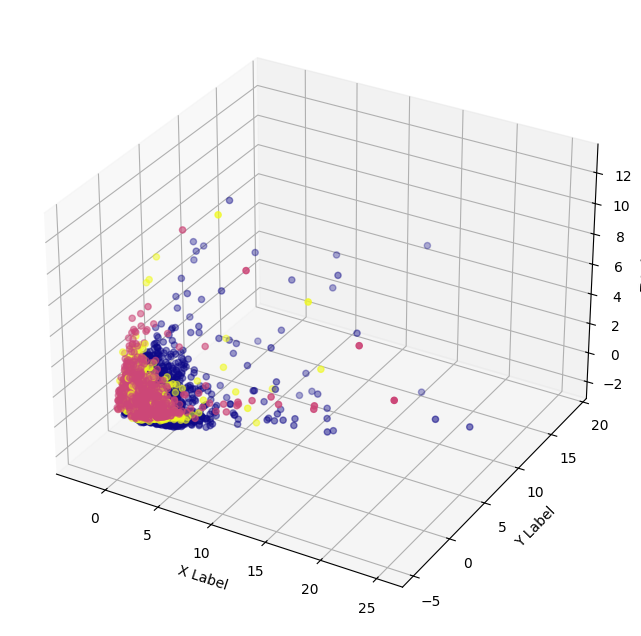

In [85]:
# Plotting in 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_usage_pca.iloc[:, 0], data_usage_pca.iloc[:, 1], data_usage_pca.iloc[:, 2], cmap='plasma', c=data["A4"])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()